<a href="https://colab.research.google.com/github/salmanromeo/MAE_3403_Computer_Methods_in_Analysis_and_Design/blob/main/lecture_2_1D_Heat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The 1-D Heat Equation**

**Solve using Euler and RK4**

#####Solve the following heat problem that will also satisfy the boundary conditions.
\begin{align}
  \dfrac{\mathrm{d}{u}}{\mathrm{d}t} = α\dfrac{\mathrm{d^2}{u}}{\mathrm{d}x^2}
    \end{align}
#####Initial condition:
\begin{align}
  u(x,0) = f(x)
    \end{align}
#####Where,
\begin{align}
  f(x) = sin(\dfrac{πx}{L})
    \end{align}
#####Boundary conditions:
\begin{align}
  u(0,t) = 0
    \end{align}
    \begin{align}
  u(L,t) = 0
    \end{align}
#####The exact solution for this partial differential equation can be written as:
\begin{align}
  u_n(x,t) = B_nsin(\dfrac{{n\pi}x}{L})exp(-α(\dfrac{n\pi}{L})^2)t
    \end{align}
#####where $n$ = 1,2,3....
#####For this $f(x)$, recalling from the Principle of Superpositionthe, the exact solution can be written as:
\begin{align}
  u(x,t) = sin(\dfrac{{\pi}x}{L})exp(-α(\dfrac{\pi}{L})^2)t
    \end{align}


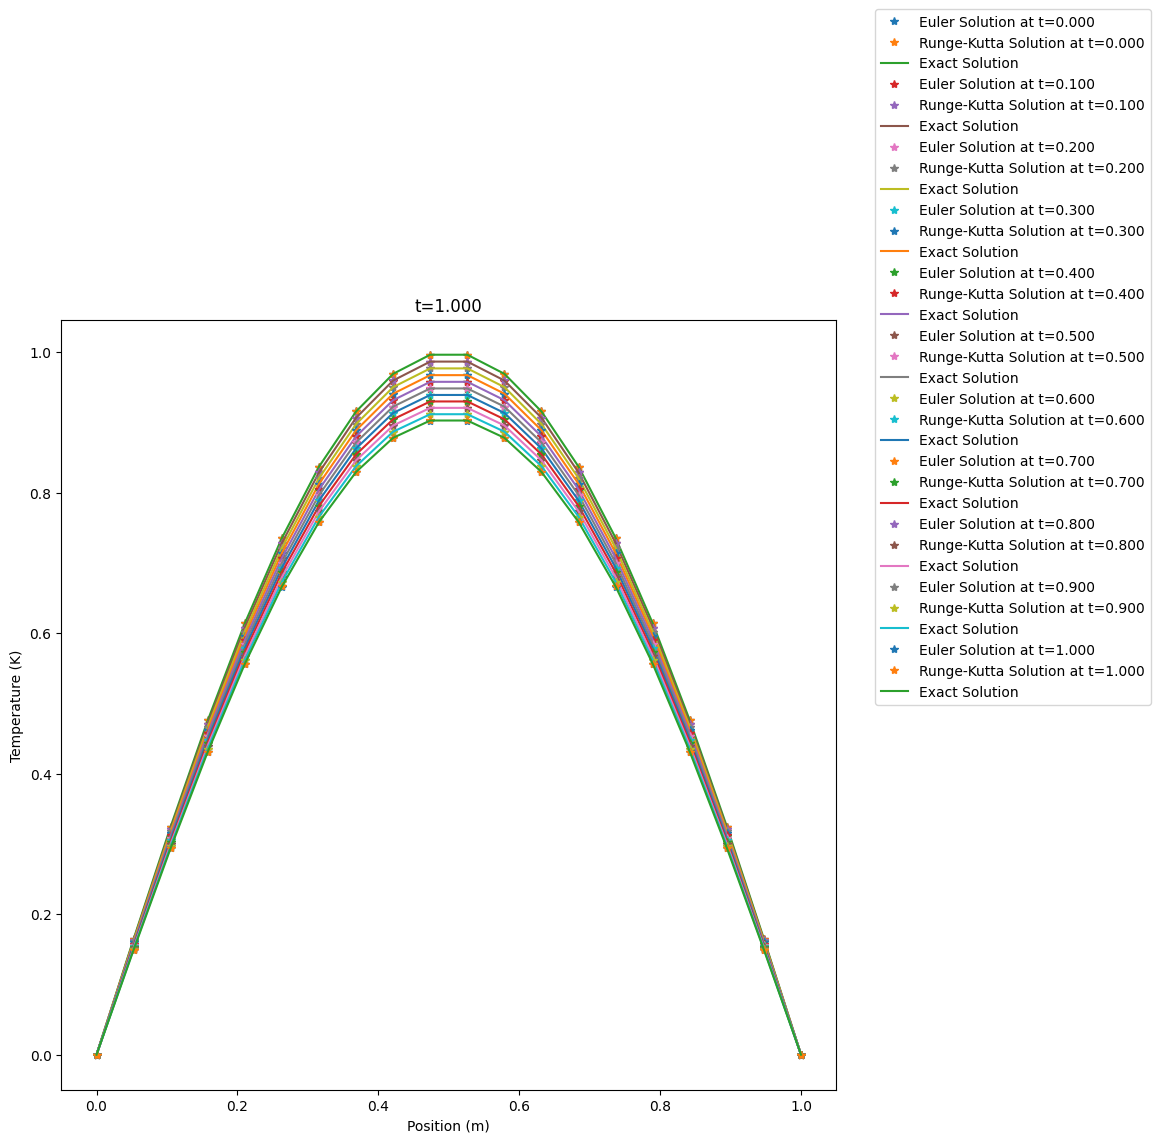

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the heat equation:
'''
du/dt = alpha*(d2u/dx2)
'''
def heat_eqn(t, u, dx, alpha):
  n = len(u)
  dudt = np.zeros_like(u)

  # Boundary conditions
  #dudt[0] = 0
  #dudt[-1] = 0

  # Discritize RHS
  for i in range(1, n-1):
    dudt[i] = alpha*(u[i+1] - 2*u[i] + u[i-1])/(dx**2)
  return dudt

# Define the Euler method
def euler(f, y0, t, h, dx, alpha):
    n = len(t)
    u = np.zeros((n, len(y0)))
    u[0] = y0
    for i in range(n-1):
        u[i+1] = u[i] + h*f(t[i], u[i], dx, alpha)
    return u

# Define the Runge-Kutta method
def runge_kutta(f, y0, t, h, dx, alpha):
  n = len(t)
  u = np.zeros((n, len(y0)))
  u[0] = y0
  for i in range(n-1):
    k1 = h*f(t[i], u[i], dx, alpha)
    k2 = h*f(t[i] + h/2, u[i] + k1/2, dx, alpha)
    k3 = h*f(t[i] + h/2, u[i] + k2/2, dx, alpha)
    k4 = h*f(t[i] + h, u[i] + k3, dx, alpha)
    u[i+1] = u[i] + (k1 + 2*k2 + 2*k3 + k4)/6
  return u

# Define the initial conditions and parameters
L = 1                      # Length of the rod
n = 20                     # Number of points on the rod {try: different discritize points, 10, 20, ....}
dx = L/(n-1)               # Spacing between points
x = np.linspace(0, L, n)   # Points on the rod
T0 = np.sin(np.pi*x/L)     # Initial temperature distribution {try: np.exp(-(x-0.5)**2/0.01}
alpha = 0.01               # Thermal diffusivity
t = np.arange(0, 1.1, 0.1)  # Time steps {try: different time steps, 0.1, 0.01, 0.001, ....}
h = t[1] - t[0]

# Use the Euler and Runge-Kutta method to solve the heat equation
solution1 = euler(heat_eqn, T0, t, h, dx, alpha)
solution2 = runge_kutta(heat_eqn, T0, t, h, dx, alpha)

# Define the exact solution
def exact_solution(x, t, alpha):
  return np.exp(-np.pi**2*alpha*t/L**2)*np.sin(np.pi*x/L)
exact = np.zeros_like(solution1)
for i in range(len(t)):
  exact[i] = exact_solution(x, t[i], alpha)

# Plot the results
fig = plt.figure(figsize=(10, 10))
for i in range(0, len(t), len(t) // 10):
  plt.plot(x, solution1[i], '*', label=f"Euler Solution at t={t[i]:.3f}")
  plt.plot(x, solution2[i], '*', label=f"Runge-Kutta Solution at t={t[i]:.3f}")
  plt.plot(x, exact[i], '-', label="Exact Solution")
plt.xlabel("Position (m)")
plt.ylabel("Temperature (K)")
plt.title(f"t={t[i]:.3f}")
plt.legend(loc=(1.05, 0.5))
plt.show()

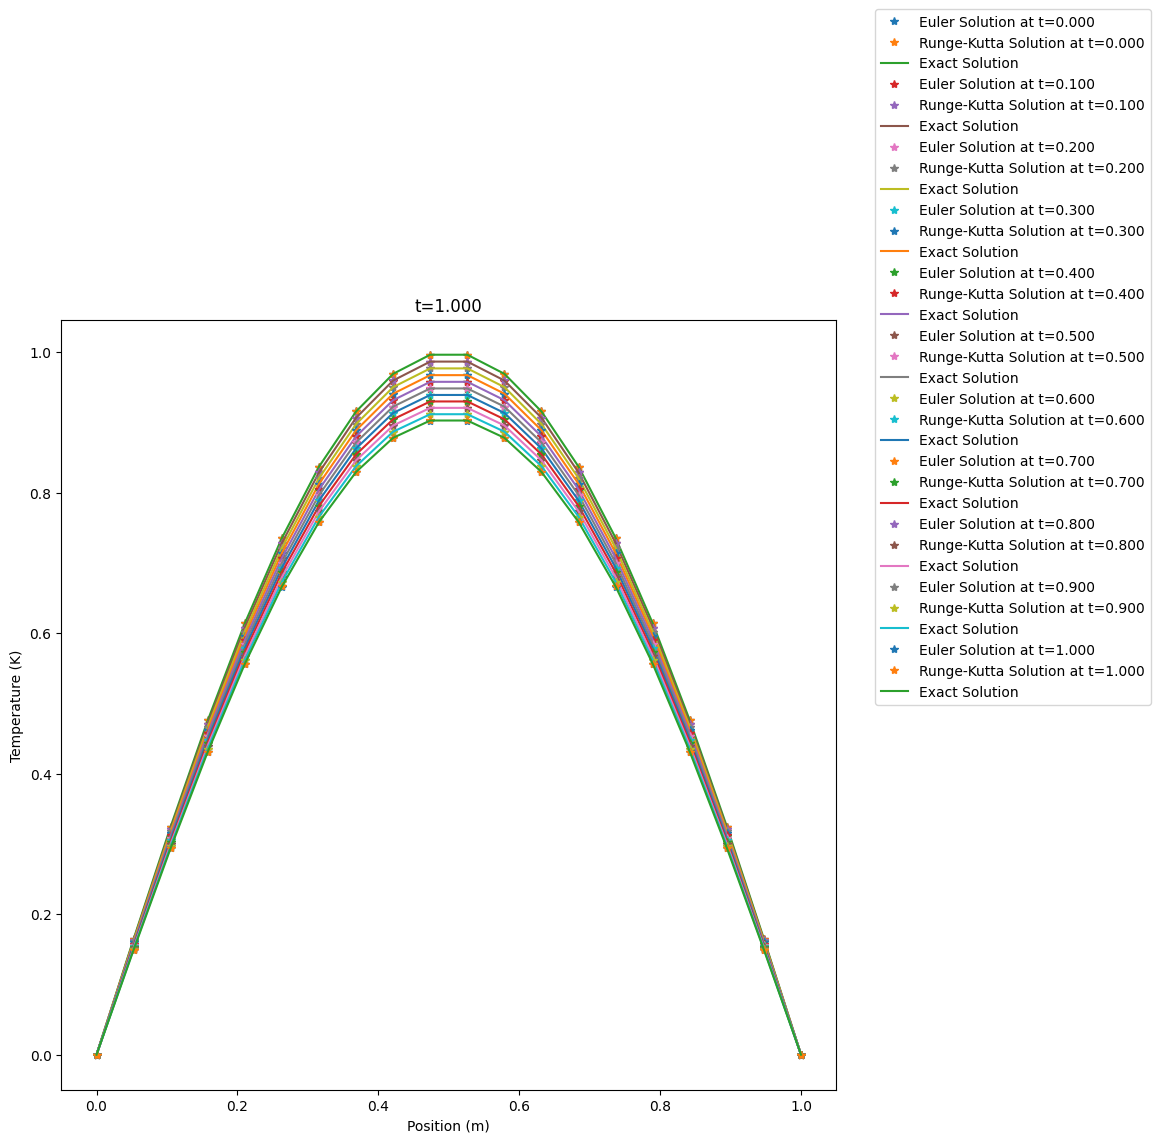

In [2]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the heat equation:
'''
du/dt = alpha*(d2u/dx2)
'''
def heat_eqn(t, u, dx, alpha):
  dudt = np.zeros_like(u)
  # Discritize RHS
  dudt[1:-1] = alpha * (u[2:] - 2*u[1:-1] + u[:-2]) / dx**2
  return dudt

# Define the Euler method
def euler(f, y0, t, h, dx, alpha):
    n = len(t)
    u = np.zeros((n, len(y0)))
    u[0] = y0
    for i in range(n-1):
        u[i+1] = u[i] + h*f(t[i], u[i], dx, alpha)
    return u

# Define the Runge-Kutta method
def runge_kutta(f, y0, t, h, dx, alpha):
  n = len(t)
  u = np.zeros((n, len(y0)))
  u[0] = y0
  for i in range(n-1):
    k1 = h * f(t[i], u[i], dx, alpha)
    k2 = h * f(t[i] + h/2, u[i] + k1/2, dx, alpha)
    k3 = h * f(t[i] + h/2, u[i] + k2/2, dx, alpha)
    k4 = h * f(t[i] + h, u[i] + k3, dx, alpha)
    u[i+1] = u[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
  return u

# Define the initial conditions and parameters
L = 1                      # Length of the rod
n = 20                     # Number of points on the rod {try: different discritize points, 10, 20, ....}
dx = L / (n - 1)           # Spacing between points
x = np.linspace(0, L, n)   # Points on the rod
T0 = np.sin(np.pi * x / L) # Initial temperature distribution {try: np.exp(-(x-0.5)**2/0.01}
alpha = 0.01               # Thermal diffusivity
t = np.arange(0, 1.1, 0.1) # Time steps {try: different time steps, 0.1, 0.01, 0.001, ....}
h = t[1] - t[0]

# Use the Euler and Runge-Kutta method to solve the heat equation
solution1 = euler(heat_eqn, T0, t, h, dx, alpha)
solution2 = runge_kutta(heat_eqn, T0, t, h, dx, alpha)

# Define the exact solution
def exact_solution(x, t, alpha):
  return np.exp(-np.pi**2 * alpha * t / L**2) * np.sin(np.pi * x / L)
exact = np.zeros_like(solution1)
for i in range(len(t)):
  exact[i] = exact_solution(x, t[i], alpha)

# Plot the results
fig = plt.figure(figsize=(10, 10))
for i in range(0, len(t), len(t) // 10):
  plt.plot(x, solution1[i], '*', label=f"Euler Solution at t={t[i]:.3f}")
  plt.plot(x, solution2[i], '*', label=f"Runge-Kutta Solution at t={t[i]:.3f}")
  plt.plot(x, exact[i], '-', label="Exact Solution")
plt.xlabel("Position (m)")
plt.ylabel("Temperature (K)")
plt.title(f"t={t[i]:.3f}")
plt.legend(loc=(1.05, 0.5))
plt.show()

**Solve using odeint**

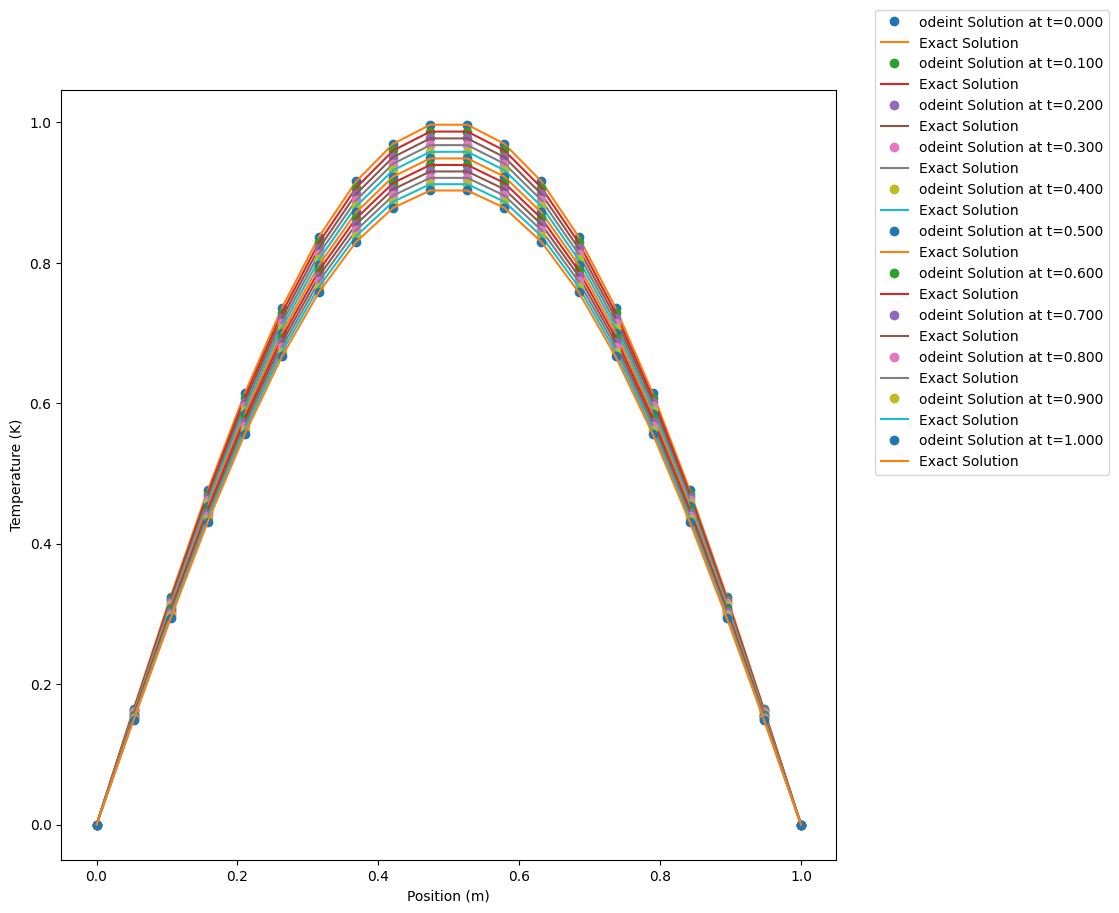

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the heat equation:
'''
dudt = alpha*(d2u/dx2)
'''
def heat_eqn(u, t, dx, alpha):
    n = len(u)
    dudt = np.zeros_like(u)

    # Boundary conditions
    dudt[0] = 0
    dudt[-1] = 0

    # Discretize RHS
    for i in range(1, n-1):
        dudt[i] = alpha*(u[i+1] - 2*u[i] + u[i-1])/(dx**2)
    return dudt

# Define the initial conditions and parameters
L = 1                      # Length of the rod
n = 20                     # Number of points on the rod
dx = L/(n-1)               # Spacing between points
x = np.linspace(0, L, n)   # Points on the rod
T0 = np.sin(np.pi*x)       # Initial temperature distribution
alpha = 0.01               # Thermal diffusivity
t = np.arange(0, 1.1, 0.1) # Time steps

# Solve the heat equation using odeint
solution = odeint(heat_eqn, T0, t, args=(dx, alpha))

# Define the exact solution
def exact_solution(x, t, alpha):
  return np.exp(-np.pi**2*alpha*t/L**2)*np.sin(np.pi*x/L)
exact = np.zeros_like(solution)
for i in range(len(t)):
  exact[i] = exact_solution(x, t[i], alpha)

# Plot the results
fig = plt.figure(figsize=(10, 10))
for i in range(0, len(t), len(t)//10):
    plt.plot(x, solution[i], 'o', label=f"odeint Solution at t={t[i]:.3f}")
    plt.plot(x, exact[i], '-', label="Exact Solution")
plt.xlabel("Position (m)")
plt.ylabel("Temperature (K)")
plt.legend(loc=(1.05,0.5))
plt.show()
